<a href="https://colab.research.google.com/github/ghdakrk/ML/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 53364 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 47000 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49828 missing from current font.
  font.set_text

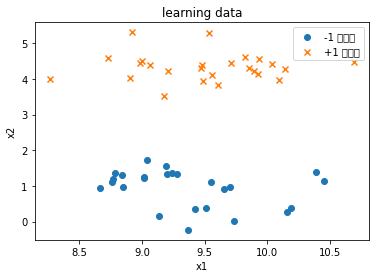

In [6]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y==-1, 0], X[y==-1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y==+1, 0], X[y==+1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title('learning data')
plt.show()

In [7]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

In [9]:
model.n_support_

array([1, 1], dtype=int32)

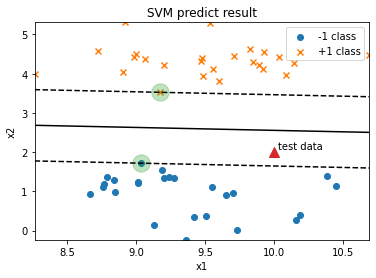

In [11]:
import numpy as np

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
 x1 = val
 x2 = X2[i, j]
 p = model.decision_function([[x1, x2]])
 Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 class")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)
x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "test data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM predict result")
plt.show()

In [13]:
from numpy.lib.npyio import load
from sklearn.datasets import load_iris
X = load_iris().data
y = load_iris().target

model = SVC(kernel='linear', C=1e10).fit(X, y)

In [17]:
model.support_vectors_

array([[5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.5, 2.3, 1.3, 0.3],
       [5.9, 3.2, 4.8, 1.8],
       [6.7, 3. , 5. , 1.7],
       [6. , 2.7, 5.1, 1.6],
       [5.1, 2.5, 3. , 1.1],
       [4.9, 2.5, 4.5, 1.7],
       [6.2, 2.8, 4.8, 1.8],
       [7.2, 3. , 5.8, 1.6],
       [6.3, 2.8, 5.1, 1.5],
       [6. , 3. , 4.8, 1.8]])

In [19]:
from sklearn.metrics import classification_report
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.98      0.96      0.97        50
           2       0.96      0.98      0.97        50

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



In [26]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:100, :2]
y = iris.target[:100]
from sklearn.svm import SVC
model = SVC(kernel="linear", C=1e10).fit(X, y)
from sklearn.metrics import classification_report
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



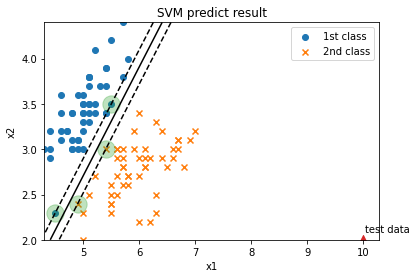

In [30]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == 0, 0], X[y == 0, 1], marker='o', label="1st class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="2nd class")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)
x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "test data")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM predict result")
plt.show()